### This file contains the code along with the markdowns required for the coursework submission for the module 'Programming Fundamentals for Data Science'

# Task 1

In [1]:
# Import required libraries
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
# Importing mlines from matplotlib
import matplotlib.lines as mlines

#### Reading the CSV dataset from GitHub

In [2]:
# Read the iris dataset csv file as a dataframe
iris_df=pd.read_csv('https://raw.githubusercontent.com/sureshrgmi/Iris/main/Iris.csv')

#### Printing the first 10 rows of the data structure

In [3]:
iris_df.head(10)

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


#### Let's see different values in the column 'Target'

In [4]:
print(iris_df.Species.unique().tolist())

['Setosa', 'Versicolor', 'Virginica']


#### In the next step, we will calculate the Central Tendency(mean and median) and Dispersion (standard deviation and range) of the column 'Petal Width' for the each of the three species in 'Target' column

In [5]:
# Using Lambda function to calculate mean, median, range and standard deviation for Petal Width value
iris_df.groupby('Species') \
  .apply(lambda x: pd.Series({
      'Mean'        : x['Petal width'].mean(),
      'Median'      : x['Petal width'].median(),
      'Range'       : x['Petal width'].max()-x['Petal width'].min(),
      'Standard Deviation'         : x['Petal width'].std()    
})
)

,Mean,Median,Range,Standard Deviation
Species,,,,
Setosa,0.244,0.2,0.5,0.107210
Versicolor,1.326,1.3,0.8,0.197753
Virginica,2.026,2.0,1.1,0.274650


# Task 2

#### Plotting Line Chart, Bar Chart and Box Plot Chart against Petal Width of Iris-setosa

### Line Chart

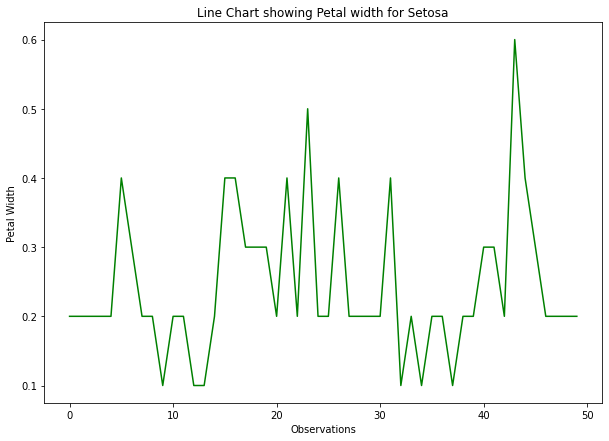

In [6]:
# Creating new dataframe for Setosa species
setosa_df=iris_df.where(iris_df['Species']=='Setosa')

#Plotting line chart
plt.figure(figsize = (10, 7))
plt.title("Line Chart showing Petal width for Setosa")
plt.xlabel("Observations")
plt.ylabel("Petal Width")
plt.plot(setosa_df['Petal width'], color ="green")
plt.show()

### Box Plot

[]

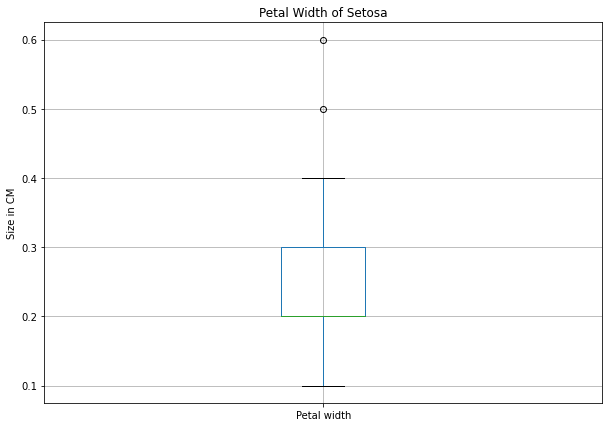

In [7]:
# Visualizing the data (Petal Width of Setosa) using Box Plot
plt.figure(figsize = (10, 7))  
plt.title("Petal Width of Setosa")
plt.ylabel("Size in CM")
b_plot = setosa_df.boxplot(column = 'Petal width') 
b_plot.plot()

### Bar Chart

<BarContainer object of 150 artists>

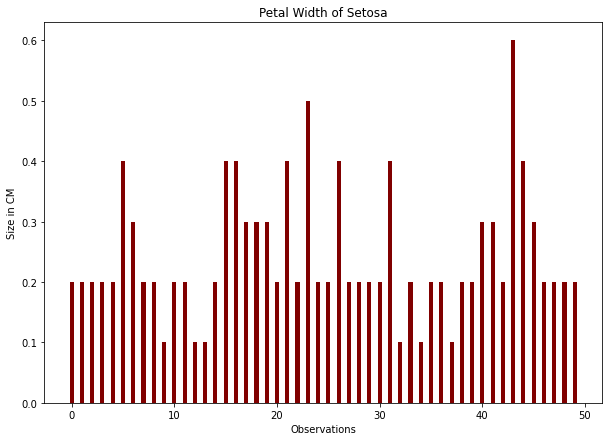

In [8]:
# Visualizing the data (Petal Width of Setosa) using Bar Chart
plt.figure(figsize = (10, 7))  
x=setosa_df.index.tolist()
plt.xlabel('Observations')
y= setosa_df['Petal width']
plt.ylabel('Size in CM')
plt.title("Petal Width of Setosa")
plt.bar(x, y, color ='maroon',
        width = 0.4)

# Task 3

### Parallel Coordinates Diagram

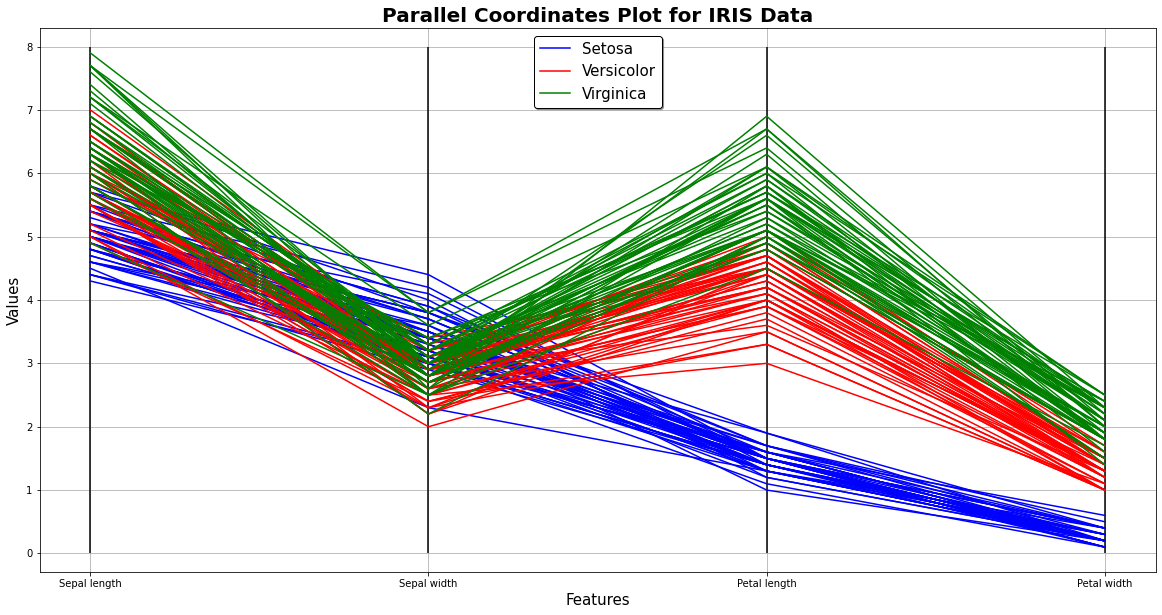

In [9]:
# Setting the figure size
plt.figure(figsize=(20 , 10))
# Specifying columns we want to plot
column_names = ["Sepal length", "Sepal width","Petal length", "Petal width"]
# Calue range for Y axis
max_value = 8
for i in range(0,4):
    plt.vlines(i, 0, max_value, 'black')
# Setting up plot parameters for each Species
for index, row in iris_df.iterrows():
    if(row['Species']=='Setosa'):
        plt.plot(column_names, row[column_names], color = 'blue', label='Setosa')
    elif (row['Species']=='Versicolor'):
        plt.plot(column_names, row[column_names], color = 'red', label='Versicolor')
    elif (row['Species']=='Virginica'):
        plt.plot(column_names, row[column_names], color = 'green', label='Virgincica')

# Variables and properties for legend
Setosa = mlines.Line2D([], [], color='blue', label='Setosa')
Versicolor = mlines.Line2D([], [], color='red', label='Versicolor')
Virginica = mlines.Line2D([], [], color='green', label='Virginica')
# Plot title
plt.title('Parallel Coordinates Plot for IRIS Data', fontsize=20, fontweight='bold')
#Plot Legend
plt.legend(loc=9, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black",handles=[Setosa, Versicolor, Virginica])
# X and Y axis labels
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
# Showing GridLines
plt.grid()


plt.show()